In [228]:
import os
import trompy as tp
import numpy as np
import csv
%matplotlib inline
from datetime import datetime
import pandas as pd
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000
import matplotlib.pyplot as plt

In [9]:
pd.read_excel(r"C:\Users\hta031\Github\FEDProtein\FEDProtein_METAFILE.xls")

,fedfile,mouse,diet,mode,sex,order
0,FED001_042322_00.CSV,FEDXA01,GRAIN,FF,M,2
1,FED001_042622_00.CSV,FEDXA01,PR,FF,M,2
2,FED001_050322_00.CSV,FEDXA01,NR,FF,M,2
3,FED001_051022_04.CSV,FEDXA01,NR,FR1,M,2
4,FED001_051122_01.CSV,FEDXA01,NR,FR1R,M,2
5,FED001_051522_00.CSV,FEDXA01,PR,ECO,M,2
6,FED002_051522_00.CSV,FEDXA01,RICH,ECO,M,2
7,FED002_042322_00.CSV,FEDXA02,GRAIN,FF,M,2
8,FED002_042622_00.CSV,FEDXA02,PR,FF,M,2
9,FED002_050322_00.CSV,FEDXA02,NR,FF,M,2


In [192]:
%run ..//source//FED_functions_COPY.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [193]:
def get_FEDevents(filename, eventname):
        
     
    
    file = open (filename)
    csvreader= csv.reader(file)
    header = []
    header = next(csvreader)
    rows= []
    for row in csvreader:
        rows.append(row)
    timestamps = []
    for row in rows: 
        if row[7] == eventname:
            date_time_obj = datetime.strptime(row [0], '%m/%d/%Y %H:%M:%S')
            timestamps.append (date_time_obj)
           
    t0 = rows[0] [0] 
    day = t0.split()[0] 
    lightson = day + " 07:00:00" 
    refpoint = datetime.strptime(lightson, '%m/%d/%Y %H:%M:%S')
    
                
    pellettimes = []
    for t in timestamps:
        Deltat = t-refpoint
        Deltatinseconds = Deltat.total_seconds()
        Deltatinhours = Deltatinseconds/3600
        pellettimes.append(Deltatinhours)
    return pellettimes

In [194]:
metafilerows , metafileheader = tp.metafilereader(metafile, sheetname="METAFILE")

File is excel file. Making csv metafile first


In [211]:

FF=[]
FR=[]

for mfr in metafilerows:
    filename= mfr[0]
    folder = r"C:\Users\hta031\Github\FEDProtein\data\\"
    fullfile = folder + filename
    file = open (fullfile)
    csvreader= csv.reader(file)
    header = []
    header = next(csvreader)
    header
    rows= []
    for row in csvreader:
        rows.append(row)
    
    numberofpellets = 0
    for row in rows: 
        if row[7] == "Pellet":
            numberofpellets=numberofpellets+1
#     print(numberofpellets)
    
#     print (mfr[2])
    
  
            
    if mfr[2] == "NR" and mfr[3]== "FF" and mfr[5]== 2 and mfr[4]=="M":
        FF.append(numberofpellets)
        
    if mfr[2] == "NR" and mfr[3]== "FR1" and mfr[5]== 2:
        FR.append(numberofpellets)
        
    
    
         

print(FR)            


print(FF)


    

[159, 192, 148, 142, 153, 145]
[1606, 1317, 1986, 1710, 1768, 1403]


In [213]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED001_050322_00.CSV"))

def tweak_fed(df):
    
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
              .loc["2022-05-09 08:00:00":] # cuts off training phase
             .loc[:,"ipi"] # could use .loc[:,["ipi", "col2", "col5" etc]] to get mutliple columns, e.g. animal name etc
           )
#tweak_fed(df) # could add animal name from metafile and diet and phase so these are returned in dataframe

In [214]:
df= tweak_fed(df)

In [215]:
# read in metafile and put pellets dataframe in keys of a dict
METAFILE = "..\FEDProtein_METAFILE.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

ff_dict = {}
for row in rows:
    # file, mouse, diet, mode, sex,order,epoch = row
    fedfile, mouse, diet, mode, sex,order = row
    if (mode == "FF") and (diet in ["NR", "PR"]):
        key = "_".join([mouse])
        ff_dict[key] = {}
        ff_dict[key]["mouse"] = mouse
        ff_dict[key]["diet"] = diet
        ff_dict[key]["sex"] = sex
        ff_dict[key]["mode"] = mode
        ff_dict[key]["order"] = int(order)
        ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, fedfile)))
    

File is excel file. Making csv metafile first


In [84]:
(ff_dict["FEDXA01"]["pellets"]
 .resample("d")
 .count()
)

t
2022-05-09    137
2022-05-10     84
Freq: D, Name: ipi, dtype: int64

In [85]:
mice=[]
for key in ff_dict.keys():
    
    mouse= key.split("_")[0]
    if mouse not in mice:
        mice.append(mouse)

In [216]:
ff_dict_all_epochs={}
for mouse in mice:
    ff_dict_all_epochs[mouse]={}
    temp=[]
    for key, val in ff_dict.items():
        if mouse in key:
            temp.append(val["pellets"])
            ff_dict_all_epochs [mouse]["order"]= val["order"]
            ff_dict_all_epochs [mouse]["mode"]= val["mode"]
            ff_dict_all_epochs [mouse]["sex"]= val["sex"]
            
            
    ff_dict_all_epochs[mouse]["pellets"]=pd.concat(temp)   
    
    
def pellets_by_day(df,maxdays=30):
    return (df
            .rename(index="n_pellets")
            .resample("d", offset = "8H")
            .count()
            .head(maxdays)#We need to add the final two rows instead of deleting last row 
            #.reset_index()
            
           )

In [217]:
ctl=[]
exp=[]
for key, val in ff_dict_all_epochs.items():
    if val["order"] == 2 and val["mode"]=="FF" and val["sex"] == "M":
        ctl.append(pellets_by_day(val["pellets"]))
    elif val["order"] == 2 and val["mode"]=="FR1" and val ["sex"] == "M":
        exp.append(pellets_by_day(val["pellets"]))

In [219]:
ctl

[t
 2022-05-09 08:00:00    212
 2022-05-10 08:00:00      9
 Freq: D, Name: n_pellets, dtype: int64,
 t
 2022-05-09 08:00:00    196
 Freq: D, Name: n_pellets, dtype: int64,
 t
 2022-05-09 08:00:00    214
 2022-05-10 08:00:00     15
 Freq: D, Name: n_pellets, dtype: int64,
 t
 2022-05-09 08:00:00    221
 2022-05-10 08:00:00      1
 Freq: D, Name: n_pellets, dtype: int64,
 t
 2022-05-09 08:00:00    223
 2022-05-10 08:00:00     11
 Freq: D, Name: n_pellets, dtype: int64,
 t
 2022-05-09 08:00:00    194
 2022-05-10 08:00:00     12
 Freq: D, Name: n_pellets, dtype: int64]

In [117]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED001_050322_00.CSV"))

def tweak_fed(df):
    
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
              .loc["2022-05-10 08:00:00":] # cuts off training phase
             .loc[:,"ipi"] # could use .loc[:,["ipi", "col2", "col5" etc]] to get mutliple columns, e.g. animal name etc
           )
#tweak_fed(df) # could add animal name from metafile and diet and phase so these are returned in dataframe

In [224]:
FR ,ctl

([159, 192, 148, 142, 153, 145],
 [t
  2022-05-09 08:00:00    212
  2022-05-10 08:00:00      9
  Freq: D, Name: n_pellets, dtype: int64,
  t
  2022-05-09 08:00:00    196
  Freq: D, Name: n_pellets, dtype: int64,
  t
  2022-05-09 08:00:00    214
  2022-05-10 08:00:00     15
  Freq: D, Name: n_pellets, dtype: int64,
  t
  2022-05-09 08:00:00    221
  2022-05-10 08:00:00      1
  Freq: D, Name: n_pellets, dtype: int64,
  t
  2022-05-09 08:00:00    223
  2022-05-10 08:00:00     11
  Freq: D, Name: n_pellets, dtype: int64,
  t
  2022-05-09 08:00:00    194
  2022-05-10 08:00:00     12
  Freq: D, Name: n_pellets, dtype: int64])

In [226]:
FF=[212,196,214,221,223,194]
FR=[159, 192, 148, 142, 153, 145]

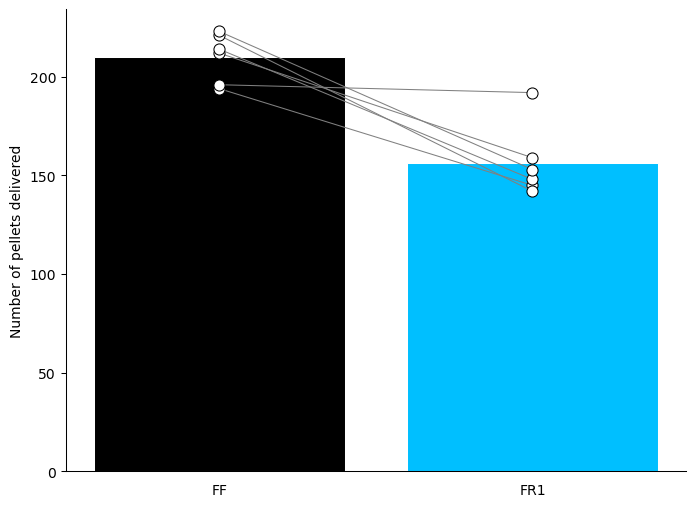

In [281]:
f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([FF,FR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.1,barwidth=0.8,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["black", "deepskyblue"],
barlabels = ["FF","FR1"] )
ax.set_ylabel("Number of pellets delivered",fontsize = 10)
figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
f.savefig(figfolder+"FF_FR1.png")